# 6.869 Miniplaces Challenge - Part 1

The miniplaces challenge is a 2 part challenge. Each part counts for 1 pset. 
In the challenge, you will work on classifying scenes into one of several categories (such as "desert", or "forest")

In this part, we'll use pretrained weights on a different dataset, but one that's also used for scene classification. We'll examine how we can visualize feature maps, to better understand how a neural net came to a decision about a particular scene.

Next week, you'll implement your own neural net to do scene classification, and try to improve it as much as you can.

# Requirements installation

First, let's install everything needed to run this notebook

In [34]:
!pip install Pillow
!pip install -U image
!pip install opencv-python

from io import BytesIO
from IPython.display import clear_output, Image, display
import numpy as np
import PIL.Image
import cv2

Requirement already up-to-date: image in /usr/local/lib/python3.7/dist-packages (1.5.33)


We will load PyTorch, our main tool to play with neural networks. 

In [35]:
!pip install torch
!pip install torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.hub

from os.path import exists


# Loading Images and PyTorch models


Once, we have loaded all the relevant libraries, we will load the model. We will begin with an scene classification model trained on the Places Dataset with a ResNet-50 architecture.

![texto alternativo](https://www.codeproject.com/KB/AI/1248963/resnet.png)



In [36]:
# Helper function to download things without wget
import requests
def download(url, fn=None):
  if fn is None:
    fn = url.split('/')[-1]
  r = requests.get(url)
  if r.status_code == 200:
      open(fn, 'wb').write(r.content)
      print("{} downloaded: {:.2f} KB".format(fn, len(r.content)/1024.))
  else:
      print("url not found:", url)

We will load the pretrained weights into the model. 

In [37]:
# Initialize the model
resnet = models.resnet50(num_classes=365)
# Download the pretrained weights
download('http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar')
# sd = torch.load('resnet50_places365.pth.tar') ['state_dict'] ## Uncomment this line if you have a GPU or are using Colab
sd = torch.load('resnet50_places365.pth.tar', map_location=torch.device('cpu')) ['state_dict'] ## Uncomment this line if you don't have a GPU

# When a model is trained using parallelism, the weights begin with "module."
# Since we aren't going to be using parallelism, we'll manually change these keys to load the state dict
sd = {k.replace('module.', ''): v for k, v in sd.items()}
resnet.load_state_dict(sd)
resnet.eval()

resnet50_places365.pth.tar downloaded: 94990.39 KB


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Visualizing Network Filters

First, we will define a function to display images from numpy arrays. 

In [38]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

Now, let's write a function to visualize the filters. You have to complete the following code, with one line normalizing the filter values:

In [39]:
def visualize_filters(conv_w, output_size = None):
    maxW = torch.max(conv_w)
    minW = torch.min(conv_w)
    w_normalized = (conv_w-minW)/(maxW-minW) #TODO: Normalize conv_w values to 0-1 range  
    map_t = 255*w_normalized
    map_t = map_t.numpy()
    map_t = map_t.astype(np.uint8)
    if output_size is not None:
        map_t = cv2.resize(map_t,(output_size,output_size))
    return map_t

We will display the filters of the initial convolutional layer:

torch.Size([64, 3, 7, 7])
Visualizing conv1 filter 0


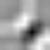

Visualizing conv1 filter 1


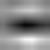

Visualizing conv1 filter 2


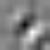

Visualizing conv1 filter 3


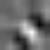

Visualizing conv1 filter 4


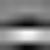

Visualizing conv1 filter 5


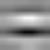

Visualizing conv1 filter 6


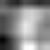

Visualizing conv1 filter 7


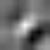

Visualizing conv1 filter 8


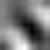

Visualizing conv1 filter 9


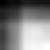

Visualizing conv1 filter 10


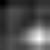

Visualizing conv1 filter 11


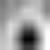

Visualizing conv1 filter 12


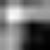

Visualizing conv1 filter 13


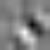

Visualizing conv1 filter 14


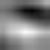

Visualizing conv1 filter 15


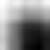

Visualizing conv1 filter 16


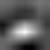

Visualizing conv1 filter 17


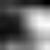

Visualizing conv1 filter 18


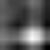

Visualizing conv1 filter 19


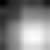

Visualizing conv1 filter 20


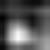

Visualizing conv1 filter 21


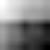

Visualizing conv1 filter 22


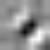

Visualizing conv1 filter 23


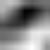

Visualizing conv1 filter 24


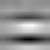

Visualizing conv1 filter 25


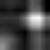

Visualizing conv1 filter 26


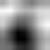

Visualizing conv1 filter 27


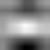

Visualizing conv1 filter 28


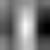

Visualizing conv1 filter 29


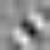

In [40]:
print(resnet.conv1.weight.data.size()) # Print the size of conv1 weights
for i in range(30):
  print('Visualizing conv1 filter', i)
  vis = visualize_filters(resnet.conv1.weight.data[i,0,:,:],50)
  showarray(vis)


## Exercise: Visualize filters for another convolutional layer in ResNet

Visualizing filter 0


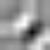

Visualizing filter 1


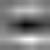

Visualizing filter 2


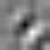

Visualizing filter 3


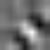

Visualizing filter 4


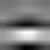

Visualizing filter 5


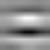

Visualizing filter 6


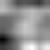

Visualizing filter 7


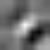

Visualizing filter 8


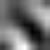

Visualizing filter 9


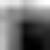

Visualizing filter 10


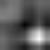

Visualizing filter 11


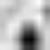

Visualizing filter 12


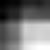

Visualizing filter 13


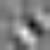

Visualizing filter 14


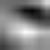

Visualizing filter 15


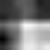

Visualizing filter 16


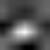

Visualizing filter 17


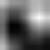

Visualizing filter 18


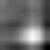

Visualizing filter 19


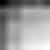

Visualizing filter 20


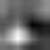

Visualizing filter 21


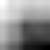

Visualizing filter 22


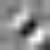

Visualizing filter 23


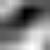

Visualizing filter 24


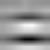

Visualizing filter 25


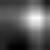

Visualizing filter 26


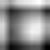

Visualizing filter 27


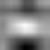

Visualizing filter 28


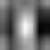

Visualizing filter 29


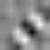

In [41]:
#TODO: pick a different layer to analyze
for i in range(30):
  print('Visualizing filter', i)
  vis_conv = visualize_filters(resnet.conv1.weight.data[i,2,:,:], 50)
  showarray(vis_conv)


# Predicting classes with a pre-trained model


To make the process easier to read, we will load the label <--> index assignament for the Places dataset. 

In [42]:
from urllib.request import urlopen
synset_url = 'http://gandissect.csail.mit.edu/models/categories_places365.txt'
classlabels = [r.split(' ')[0][3:] for r in urlopen(synset_url).read().decode('utf-8').split('\n')]

We will load one image to use through the pset. 

rio.jpg downloaded: 178.28 KB


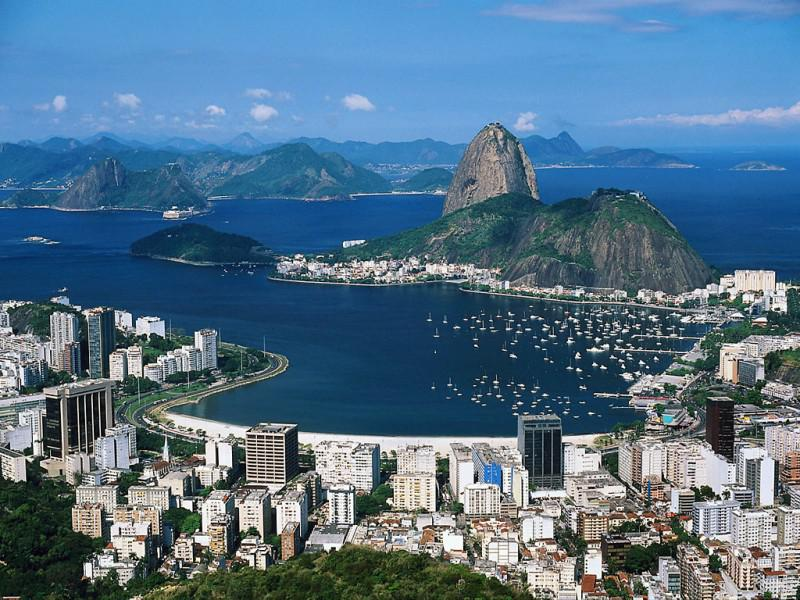

In [43]:
from torchvision import transforms
download('http://6.869.csail.mit.edu/fa19/miniplaces_part1/rio.jpg')
img_pil = PIL.Image.open('rio.jpg').convert('RGB')
img_numpy = np.array(img_pil)
showarray(img_numpy)

First, let's take a look at the raw prediction of the model.

In [44]:
  #data preprocessing: resize an image, change it from a PIL image to a pytorch tensor, normalize it according to dataset statistics
  center_crop = transforms.Compose([
         transforms.Resize((227,227)),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])
  
  #our model can only take input that is preprocessed, so preprocess our loaded image
  img_tensor = center_crop(img_pil)
  logits = resnet(img_tensor.unsqueeze(0)).squeeze()
  # get the indices associated with the topk logits
  categories = logits.topk(5)[1] 
    
  #print the labels corresponding to the topk indices
  print(categories)
  print(', '.join([classlabels[cat] for cat in categories]))

tensor([348, 194,  49,  97, 171])
village, islet, beach_house, coast, harbor


# Visualizing Internal Activations of the Network

Let's look at what parts of the image cause different units to activate (send some positive signal). All of these activations combine to inform the final inference. 

The convolutional layers of ResNet essentially make a semantic representation of what is contained in the image. This is followed by two fully connected layers, which use the information from that representation to categorize the image.

So, let's remove the last few layers (which do classification) to get the underlying representation, and we'll visualize the activations that went into that representation from different units

In [45]:
def generate_featuremap_unit(model_cut,unit_id,im_input):
    # Extract activation from model
    # Mark the model as being used for inference
    model_cut.eval()
    # Crop the image
    im = center_crop(im_input)
    # Place the image into a batch of size 1, and use the model to get an intermediate representation
    activations = model_cut(im.unsqueeze(0))
    # Print the shape of our representation
    print(activations.size())
    # Extract the only result from this batch, and take just the `unit_id`th channel
    # Return this channel
    return activations.squeeze()[unit_id]

In [46]:
def visualize_featuremap(im_input,feature_map,alpha=0.3):
    # Normalize to [0..1], with a little leeway (0.9999) in case feature_map has 0 range
    feature_map = feature_map/(feature_map.max()+1e-10)
    # Convert to numpy (detach() just seperates a tensor from the gradient)
    feat_numpy = feature_map.detach().numpy()
    # Resize the feature map to our original image size (our strided conv layers reduce the size of the image)
    feat_numpy = cv2.resize(feat_numpy,(im_input.shape[1],im_input.shape[0]))
    # Invert to make the heatmap look more natural
    map_t = 1-feat_numpy
    # Add an extra dimension to make this a [H,W,C=1] image 
    feat_numpy = np.expand_dims(feat_numpy, axis=2)
    
    # Convert to image (UINT8 from 0-255)
    map_t = 255*map_t
    map_t = map_t.astype(np.uint8)
    # Use a color map to change this from BW to a nice color
    map_t = cv2.applyColorMap(map_t, cv2.COLORMAP_JET)
    # Combine the heatmap with the original image so you can see which section of the image is activated
    im_final = np.multiply((alpha*im_input + (1-alpha)*map_t), feat_numpy) + np.multiply(im_input, 1-feat_numpy)
    # Return final visualization
    return im_final

In [47]:
# TODO: remove the last 2 layers of resnet 
# Note: the .children() function of nn.Module (which resnet50 inherits from) and nn.Sequential() will be useful
model_cut = nn.Sequential(*list(resnet.children())[:-2])

torch.Size([1, 2048, 8, 8])


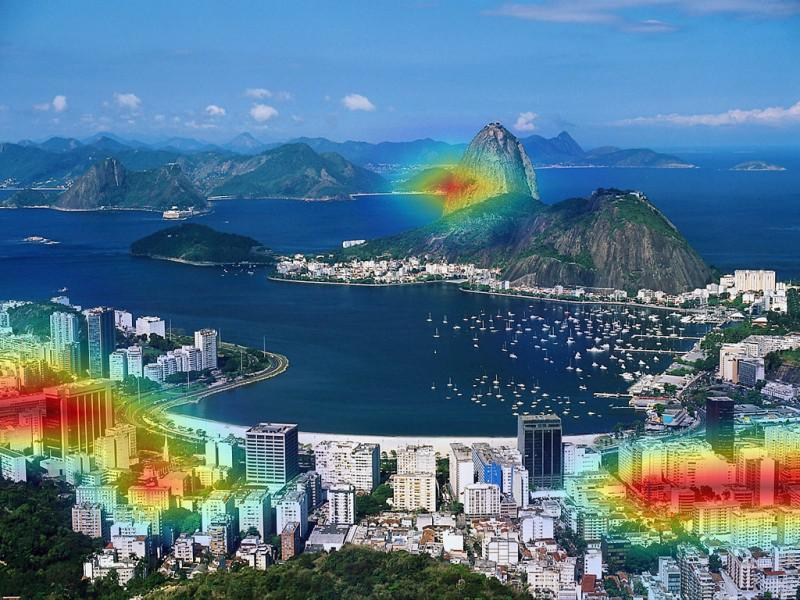

In [48]:
# TODO: search for mountain, sky, and building units
feat = generate_featuremap_unit(model_cut, 70, img_pil)
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

tensor(474)
Original top 5 class names  ['village', 'islet', 'beach_house', 'coast', 'harbor']
Original top 5 class values  [8.457634  8.360574  7.7587166 6.94687   6.7943234]
Modified top 5 class names  ['islet', 'beach_house', 'village', 'coast', 'harbor']
Modified top 5 class values  [8.071368  7.2446146 7.2041817 6.5970626 6.4877353]
torch.Size([1, 2048, 8, 8])


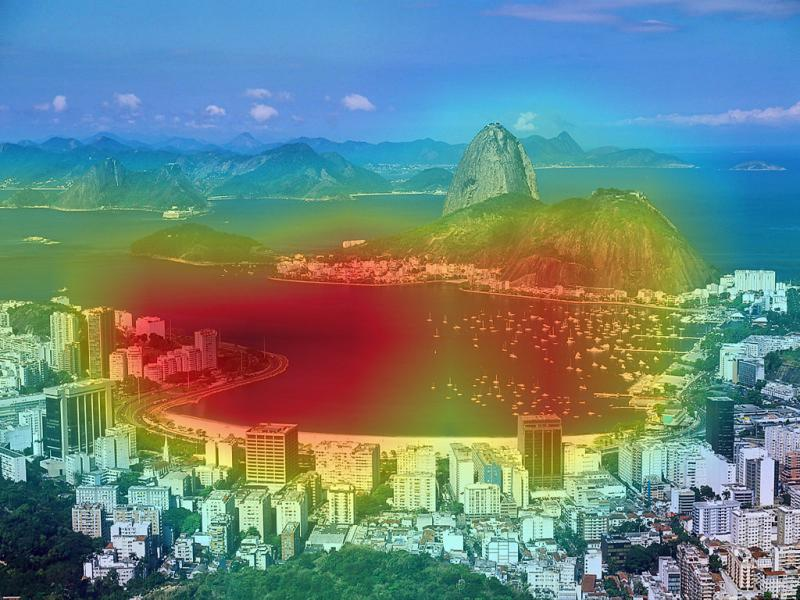

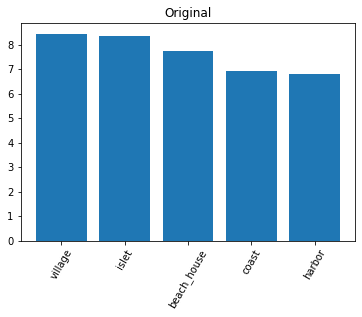

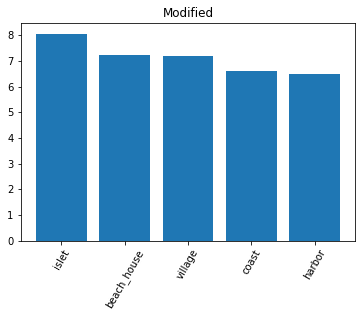

In [50]:
# (6.869 required) Find the unit index that has the maximum weights in the fully connected layer and deactivate that unit. Compare the orginal prediction and the new prediction
import matplotlib.pyplot as plt

out_original = resnet(img_tensor.unsqueeze(0)).squeeze() #original prediction 
class_ids = np.argsort(-out_original.data.cpu().numpy())[0]
index = torch.topk(resnet.fc.weight[class_ids,:], k=5)[1]
print(index[0])

# Get the output features for this model
features = model_cut(img_tensor.unsqueeze(0))
# Shape is now (1, # units, H, W)
# TODO: deactivate the unit index that has the maximum weights (Set all values for that unit to 0)
features[:,index,:,:] = torch.zeros(features[:,index,:,:].shape) 

# TODO: run the modified features through the last two layers of the original network
avg_pool_out = resnet.avgpool(features).squeeze().unsqueeze(0)
out_modified = resnet.fc(avg_pool_out).squeeze()

def plot_top_classes(values, top_k=5, title = None):
  sorted_classes = np.argsort(-values)
  class_ids = sorted_classes[:top_k]
  class_names = [classlabels[it] for it in list(class_ids)]
  class_values = values[class_ids]
  print(title + " top 5 class names ", class_names)
  print(title + " top 5 class values ", class_values)
  plt.bar(class_names, class_values)
  plt.xticks(rotation=60)
  plt.title(title)

plt.figure(0)
plot_top_classes(out_original.data.cpu().numpy(), title = 'Original')
plt.figure(1)
plot_top_classes(out_modified.data.cpu().numpy(), title = 'Modified')

feat = generate_featuremap_unit(model_cut, index[0], img_pil)
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

# Visualizing model activations with Class Activation Maps (CAMs)

Once we have load the image and the model, now we will explore how to visualize the internal activations of the model. We will start by visualizing which parts of the image are responsibe for the final decision. 

![texto alternativo](https://camo.githubusercontent.com/fb9a2d0813e5d530f49fa074c378cf83959346f7/687474703a2f2f636e6e6c6f63616c697a6174696f6e2e637361696c2e6d69742e6564752f6672616d65776f726b2e6a7067)



We create a version of the model without the last two layers, so that we can access the last convolutional layer.

We compute the activations using the Class Activation Mapping for a given output label. 

In [51]:
def generate_featuremap_CAM(model,unit_id,im_input):
    #Extract activation from model
    model.eval()    
    im = center_crop(im_input)
    activations = model(im.unsqueeze(0)).squeeze() #2048 x h x w
    num_channels, height, width = activations.shape

    # TODO: convert the shape of the output (out variable) to (h*w) x c 
    # The .view() function and .transpose() functions will help
    activations_reshaped = torch.transpose(activations.view(num_channels, height*width), 0, 1)

    # TODO: Run the fully connected layer from resnet to compute the weighted average with activations as the input variable
    # out_final should be a h x w x 365 tensor. 
    out_final = list(resnet.children())[-1](activations_reshaped)

    # TODO: obtain the class activation map for the corresponding unit_id
    # class_activation_maps should be a 365 x height x width tensor. 
    class_activation_maps = out_final.transpose(0, 1).view(-1, height, width)
    return class_activation_maps[unit_id]

We can visualize the most activated region in the image for the 5 main top classes. 

Visualizing category village


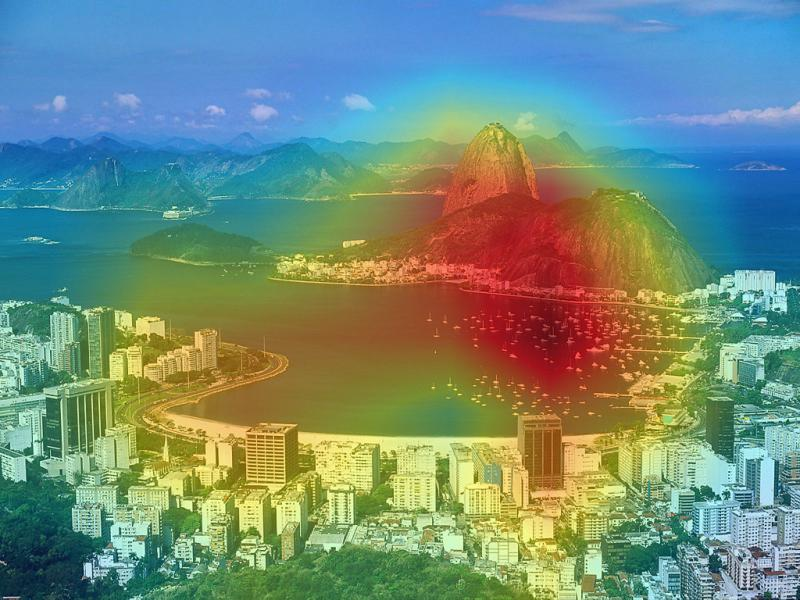

Visualizing category islet


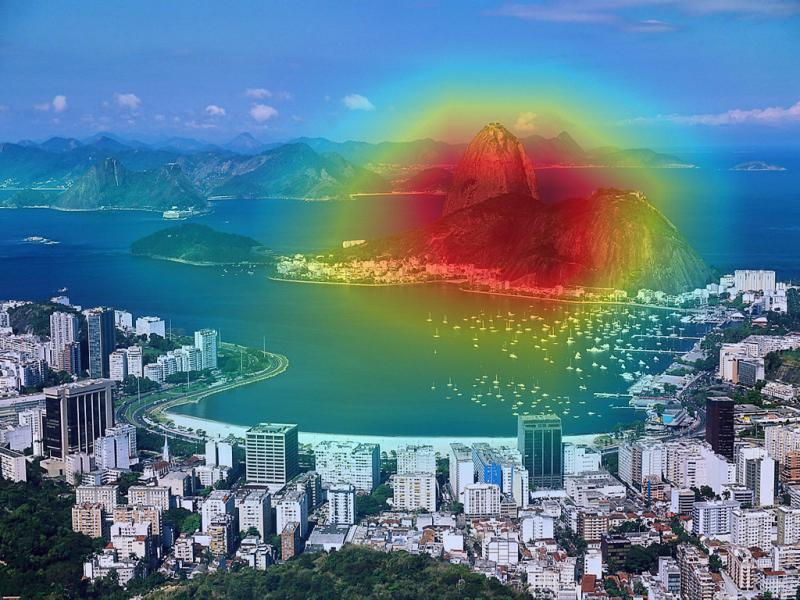

Visualizing category beach_house


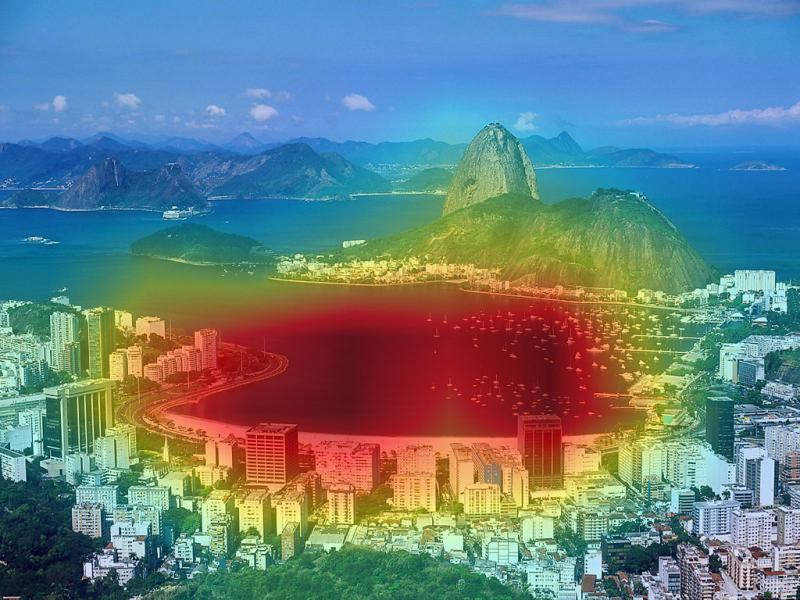

Visualizing category coast


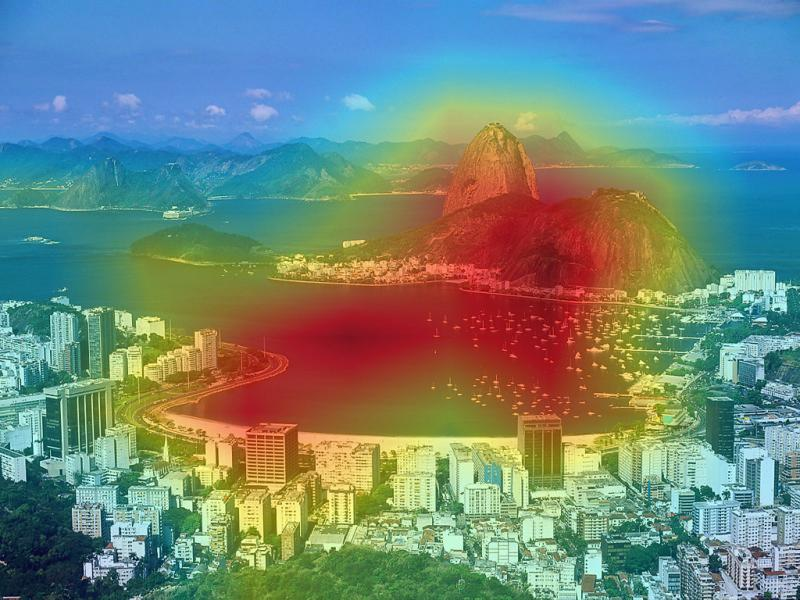

Visualizing category harbor


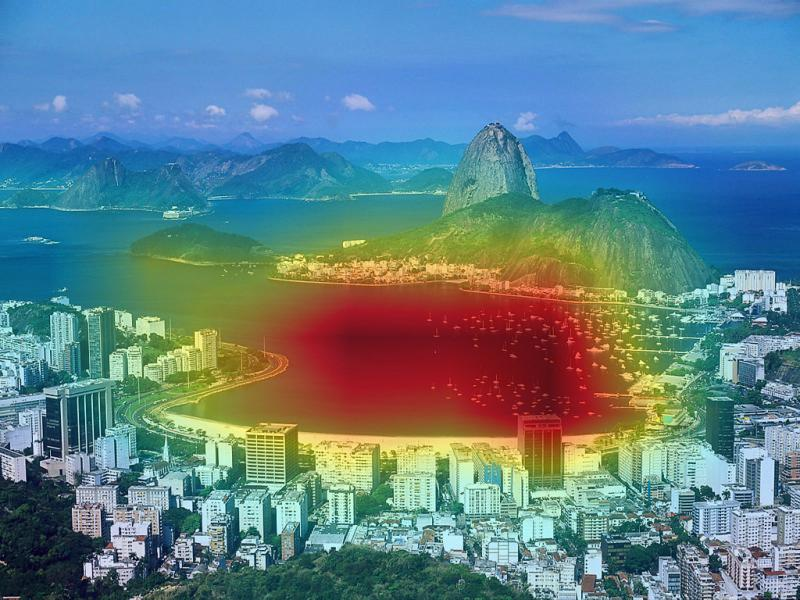

In [52]:
for i in range(categories.shape[0]):
  print('Visualizing category',classlabels[categories[i]])
  feat = generate_featuremap_CAM(model_cut, categories[i].item(), img_pil)
  im_result = visualize_featuremap(img_numpy,feat)
  showarray(im_result)


best-greek-islands-santorini.jpg downloaded: 55.60 KB


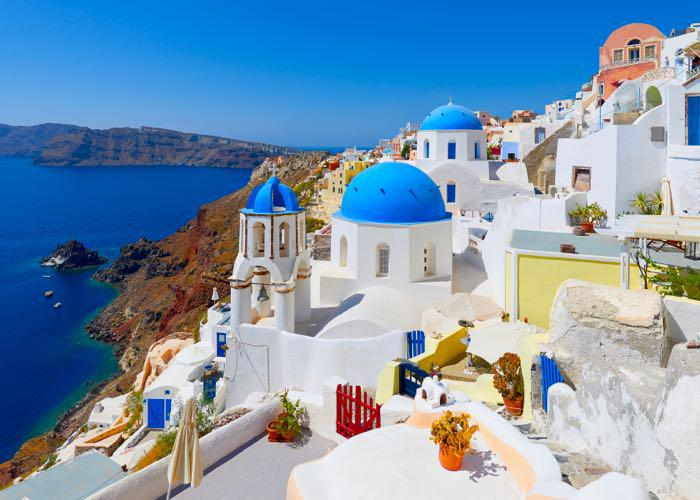

In [53]:
#Optional: Try with your own image. 
download('https://santorinidave.com/wp-content/uploads/2017/10/best-greek-islands-santorini.jpg')
img_pil = PIL.Image.open('best-greek-islands-santorini.jpg').convert('RGB')
img_numpy = np.array(img_pil)
showarray(img_numpy)

Visualizing category village


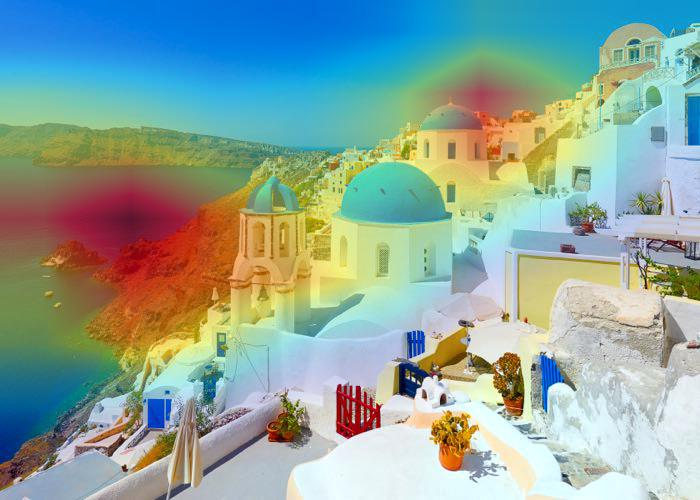

Visualizing category islet


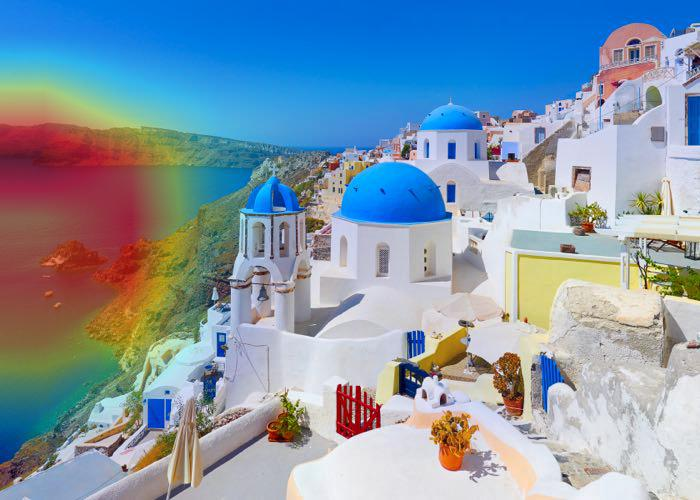

Visualizing category beach_house


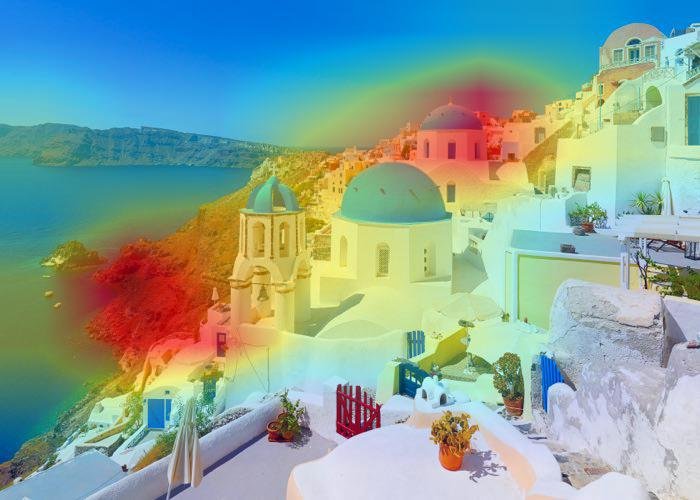

Visualizing category coast


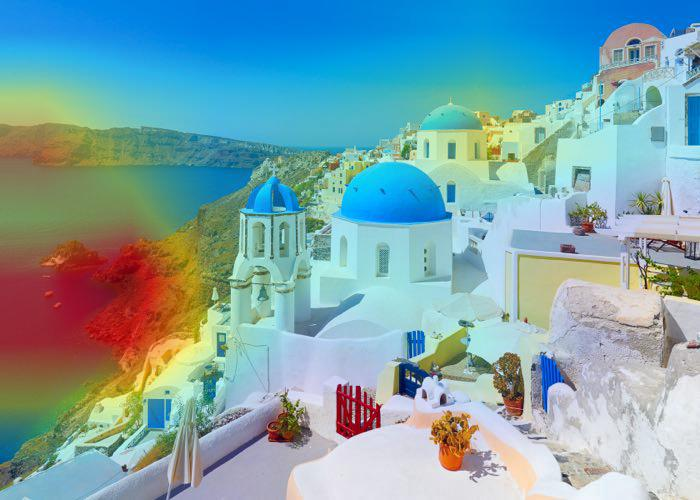

Visualizing category harbor


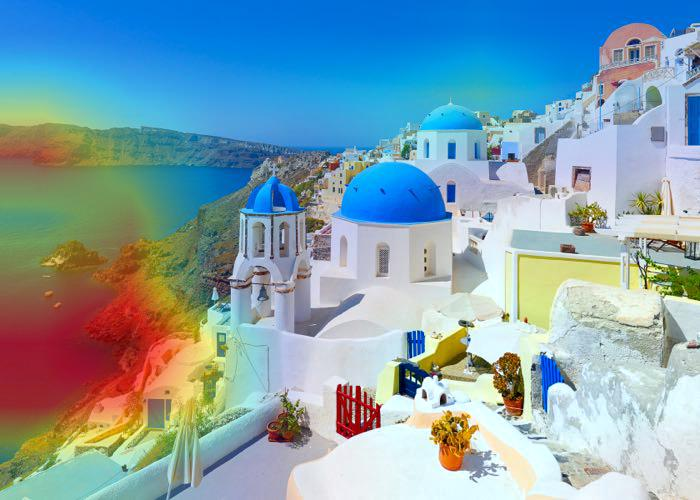

In [54]:
for i in range(categories.shape[0]):
  print('Visualizing category',classlabels[categories[i]])
  feat = generate_featuremap_CAM(model_cut, categories[i].item(), img_pil)
  im_result = visualize_featuremap(img_numpy,feat)
  showarray(im_result)
